# keras pygad imageclassification CNN
* Document : https://blog.paperspace.com/train-keras-models-using-genetic-algorithm-with-pygad/
* Source : https://github.com/ahmedfgad/KerasGA


In [2]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.9 MB/s 


In [3]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))



# Build the keras model using the functional API.


In [5]:
input_layer = tensorflow.keras.layers.Input(shape=(100, 100, 3))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=5,
                                             kernel_size=7,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(5,5),
                                                 strides=5)(conv_layer1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=3,
                                             kernel_size=3,
                                             activation="relu")(max_pool1)
flatten_layer  = tensorflow.keras.layers.Flatten()(conv_layer2)
dense_layer = tensorflow.keras.layers.Dense(15, activation="relu")(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(4, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)



# Create an instance of the pygad.kerasga.KerasGA class to build the initial population.


In [7]:
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)



# Data inputs


In [8]:
![ ! -f dataset_inputs.npy ]&&wget https://raw.githubusercontent.com/ahmedfgad/KerasGA/master/dataset_inputs.npy
data_inputs = numpy.load("dataset_inputs.npy")



--2022-12-21 02:55:13--  https://raw.githubusercontent.com/ahmedfgad/KerasGA/master/dataset_inputs.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19200128 (18M) [application/octet-stream]
Saving to: ‘dataset_inputs.npy’

dataset_inputs.npy  100%[===================>]  18.31M  --.-KB/s    in 0.05s   

2022-12-21 02:55:14 (365 MB/s) - ‘dataset_inputs.npy’ saved [19200128/19200128]



# Data outputs


In [9]:
![ ! -f dataset_outputs.npy ]&&wget https://raw.githubusercontent.com/ahmedfgad/KerasGA/master/dataset_outputs.npy
data_outputs = numpy.load("dataset_outputs.npy")
data_outputs = tensorflow.keras.utils.to_categorical(data_outputs)



--2022-12-21 02:55:59--  https://raw.githubusercontent.com/ahmedfgad/KerasGA/master/dataset_outputs.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 768 [application/octet-stream]
Saving to: ‘dataset_outputs.npy’

dataset_outputs.npy 100%[===================>]     768  --.-KB/s    in 0s      

2022-12-21 02:55:59 (53.1 MB/s) - ‘dataset_outputs.npy’ saved [768/768]



# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class


In [10]:
num_generations = 200 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights.



# Create an instance of the pygad.GA class


In [11]:
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)



# Start the genetic algorithm evolution.


In [12]:
ga_instance.run()



3/3 [==============================] - 0s 4ms/step
Generation = 1
3/3 [==============================] - 0s 4ms/step
Fitness    = 0.12726578253383666
3/3 [==============================] - 0s 4ms/step
Generation = 2
3/3 [==============================] - 0s 4ms/step
Fitness    = 0.12726578253383666
3/3 [==============================] - 0s 4ms/step
Generation = 3
3/3 [==============================] - 0s 5ms/step
Fitness    = 0.15510517889107234
3/3 [==============================] - 0s 4ms/step
Generation = 4
3/3 [==============================] - 0s 5ms/step
Fitness    = 0.15510517889107234
3/3 [==============================] - 0s 4ms/step
Generation = 5
3/3 [==============================] - 0s 4ms/step
Fitness    = 0.2612297767309487
3/3 [==============================] - 0s 4ms/step
Generation = 6
3/3 [==============================] - 0s 5ms/step
Fitness    = 0.2612297767309487
3/3 [==============================] - 0s 4ms/step
Generation = 7
3/3 [==============================]

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.


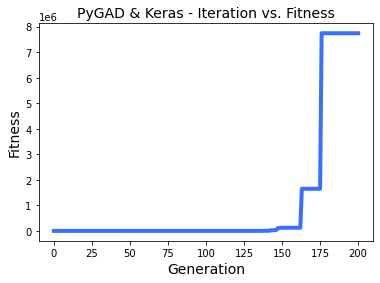

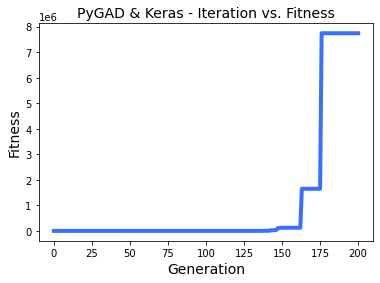

In [13]:
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)



# Returning the details of the best solution.

In [14]:

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
# print("Predictions : \n", predictions)



3/3 [==============================] - 0s 4ms/step
Fitness value of the best solution = 7739380.763515218
Index of the best solution : 0
3/3 [==============================] - 0s 4ms/step


# Calculate the categorical crossentropy for the trained model.


In [15]:
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())



Categorical Crossentropy :  1.192093e-07


# Calculate the classification accuracy for the trained model.


In [16]:
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)

# model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
# _ = model.fit(x, y, verbose=0)
# r = model.predict(data_inputs)

Accuracy :  1.0
